<h1 style="text-align: center; color: blue;">Equipment Health Monitoring System</h1>

Determining  the type of failure to reduce machine downtime and ensure the reliability of correct maintenance.

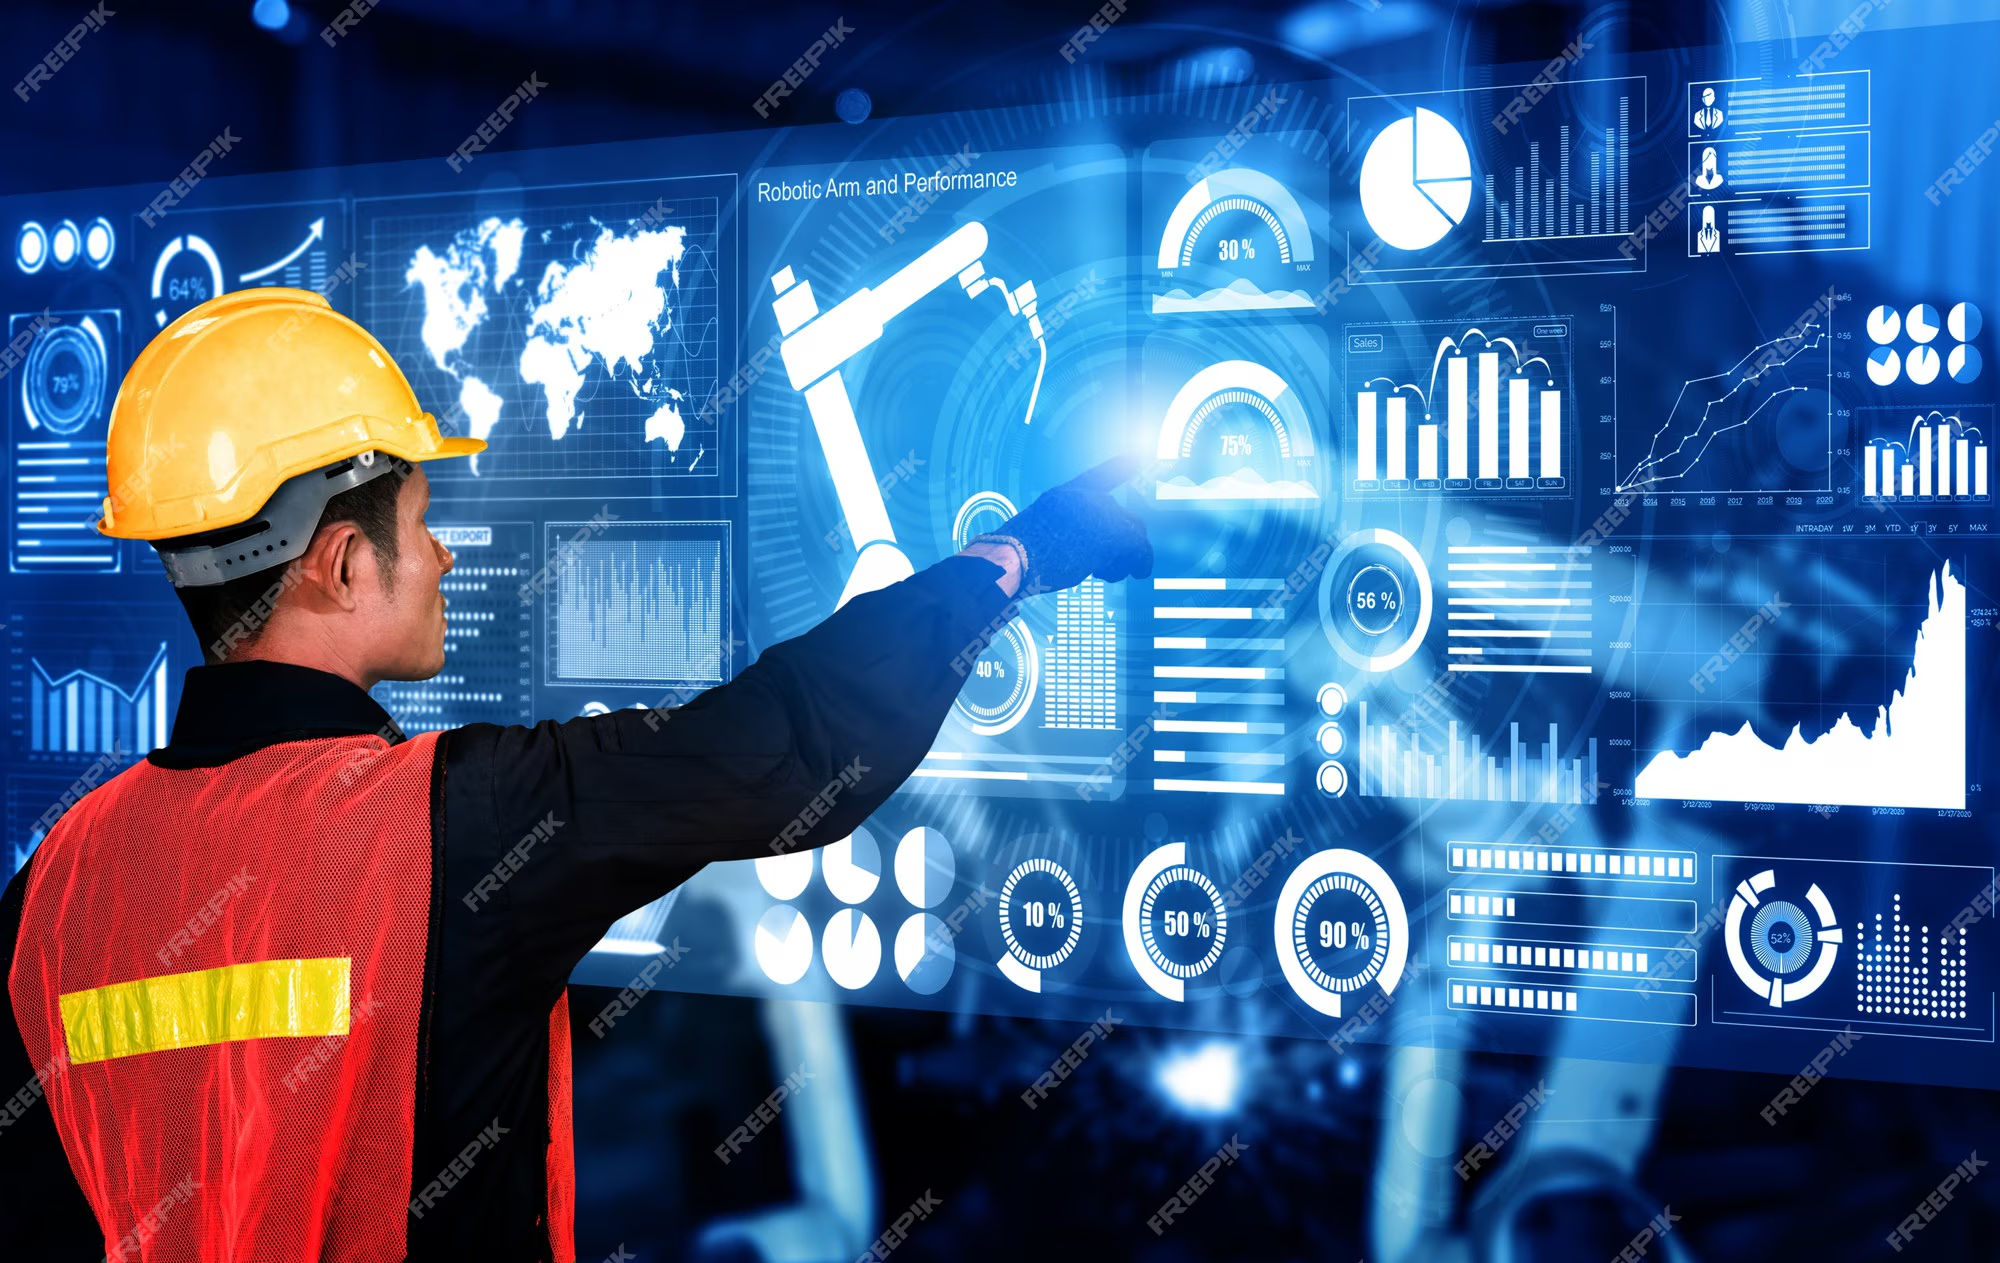

Manufacturing businesses typically incur large expenses and operational interruptions from unanticipated equipment breakdowns. Reactive maintenance, which fixes after a failure, may increase downtime, costs, and safety issues. We want to create a predictive maintenance system that uses sensor data to identify equipment problems.

The dataset has 10,000 14-feature points. These features include unique identifiers (UIDs), product IDs denoted by L, M, or H for low, medium, and high-quality variants, air temperature, process temperature, rotational speed, torque, tool wear, and a'machine failure' label.
The term'machine failure' refers to five different failure modes: tool wear failure (TWF), heat dissipation failure (HDF), power failure (PWF), overstrain failure (OSF), and random failures. Tool wear surpassing a threshold, heat dissipation producing temperature differences, power needs exceeding limitations, or random failure occurrences cause process failure in each failure category.

The dataset shows a situation where the'machine failure' label indicates if any of the listed failure categories happened. Predictive maintenance and equipment performance under varied situations need this knowledge.



## Import the libraries used in the project

In [1]:
# Data wrangling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Off FutureWarnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Upload df
df = pd.read_csv('/Users/vijaykumarreddybommireddy/Downloads/Data analytics/failures_data.csv')
pd.options.mode.chained_assignment = None
df

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[10000 rows x 10 columns]

In [3]:
# Verify if the data has duplicate values
data_duplicates = df.duplicated().sum()
print("Total duplicated values: ", data_duplicates)

Total duplicated values:  0


In [4]:
# Verify if the data has missing values
data_null = df.isnull().sum().sum()
print("Total missing values: ", data_null)

Total missing values:  0


In [5]:
## Verify the data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [6]:
## Numeric features analysis
df.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  
count            10000.000000  10000.000000     10000.000000  10000.000000  
mean              1538.776100     39.986910       107.951000      0.033900  
std                179.284096      9.968934        63.654147      0.180981  
min               1168.000000      3.800000         0.000000      0.000000  
25%               1423.000000     33.200000        53.000000      0.000000  
50%               1503.000000     40.100000       108.000000      0.000000  
75%               1612.000000     46.800000       162.000000      0.000000  
max               2886.000000     76.600000       253.000000      1.000000

In [7]:
## Verify the proportion of column "Target"
df.Target.value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

In [8]:
## Verify the proportion of column "Failure_type"
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

## Data Preparation

In [9]:
rename_columns = {
    'UDI':'ID',
    'Air temperature [K]': 'Air_temperature',
    'Process temperature [K]' : 'Process_temperature',
    'Rotational speed [rpm]' : 'Rotational_speed',
    'Torque [Nm]' : 'Torque',
    'Tool wear [min]' : 'Tool_wear',
    'Product ID' : 'Product_ID',
    'Failure Type': 'Failure_type'    
}

df.rename(rename_columns, axis = 1, inplace = True)

In [10]:
# Analysing redundance value, count failures on "Target" column
count_failures = (df['Target'] == 1).sum()
print('Number of failures:', count_failures)

# Sum of occurrences of 'Failure_type' other than 'No Failure'
sum_failures = df.loc[(df['Failure_type'] != 'No Failure') & (df['Target'] == 1), 'Failure_type'].count()
print('Sum of failures different of "No Failure":', sum_failures)

Number of failures: 339
Sum of failures different of "No Failure": 330


As we can see there are 9 ambiguos values, so we need remove this.

In [11]:
# Filter the rows with has 1 in the column "Target" and 'No Failure' in the column 'Failure_type'
rows_to_remove = df[(df['Target'] == 1) & (df['Failure_type'] == 'No Failure')]

# Remove this filtered row in the main df
df.drop(rows_to_remove.index, inplace=True)

In [12]:
#Removing unnecessary columnds
drop_columns = ["ID", "Product_ID", "Target"]
df.drop(drop_columns, axis = 1, inplace = True)

We dont have a significant quantity of this class to try predict when it happen, so if we dont remove this now, we can have problems relacioned a big imbalanced classes. As us objetive is classfy the type of failure and apply the concepts of data science, i will remove this

In [13]:
# Removing "Random Failures" of the "Failure_type" column.
df = df.loc[df['Failure_type'] != 'Random Failures']

In [14]:
## Renaming the classes
rename_type = {
    'L':'Low',
    'M':'Medium',
    'H':'High'
}
df['Type'].replace(rename_type, inplace = True)

## Visualization

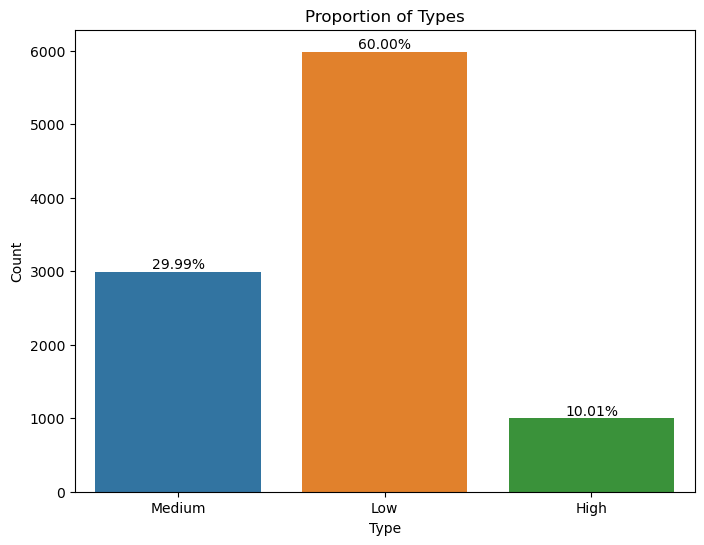

In [15]:
# Count types
tipo_contagem = df['Type'].value_counts()

# Show graphic
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Type')
plt.title('Proportion of Types')
plt.xlabel('Type')
plt.ylabel('Count')

# Add as percentages as labels
total = len(df['Type'])
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')
plt.show()

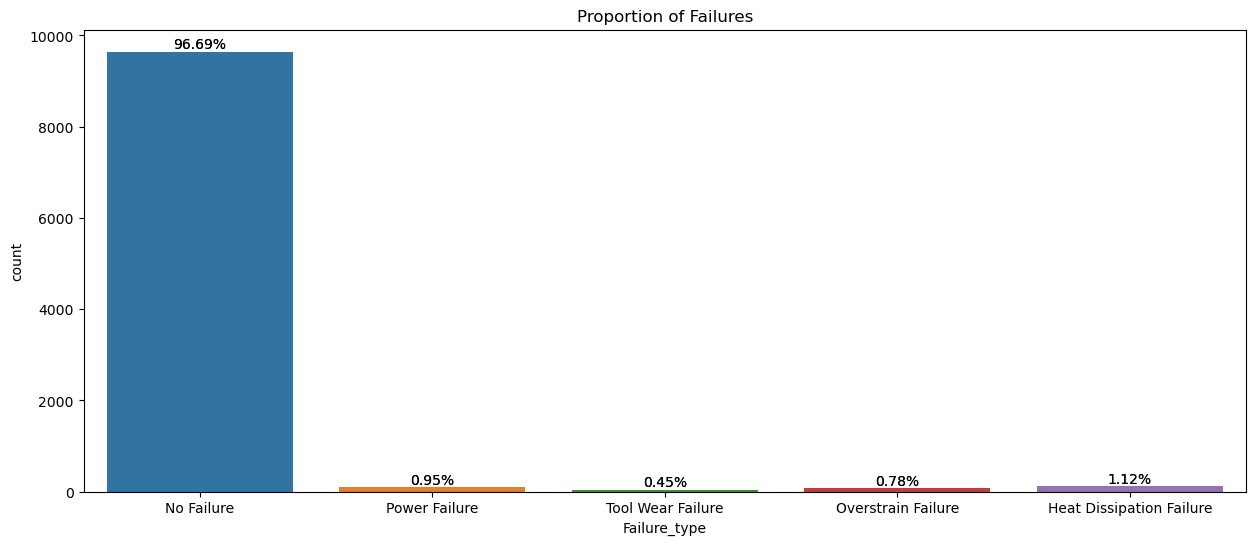

In [16]:
# Count types
tipo_contagem = df['Failure_type'].value_counts()

# Plot bar graphic
plt.figure(figsize=(15, 6))
ax = sns.countplot(data=df, x='Failure_type')
plt.title('Proportion of Failures')
plt.xlabel('Type')
plt.ylabel('Count')
ax = sns.countplot(data=df, x = 'Failure_type')

# Add as percentages as labels
total = len(df['Failure_type'])
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')
plt.show()

As we can see, we have two problems here to model our model. The first is unbalanced classes, we’ll need apply some strategic to can biuld a modest model like SMOTE-NC for example. The second is that we’ll deal with multiclass problem, it’s important always pay attetion is this too.



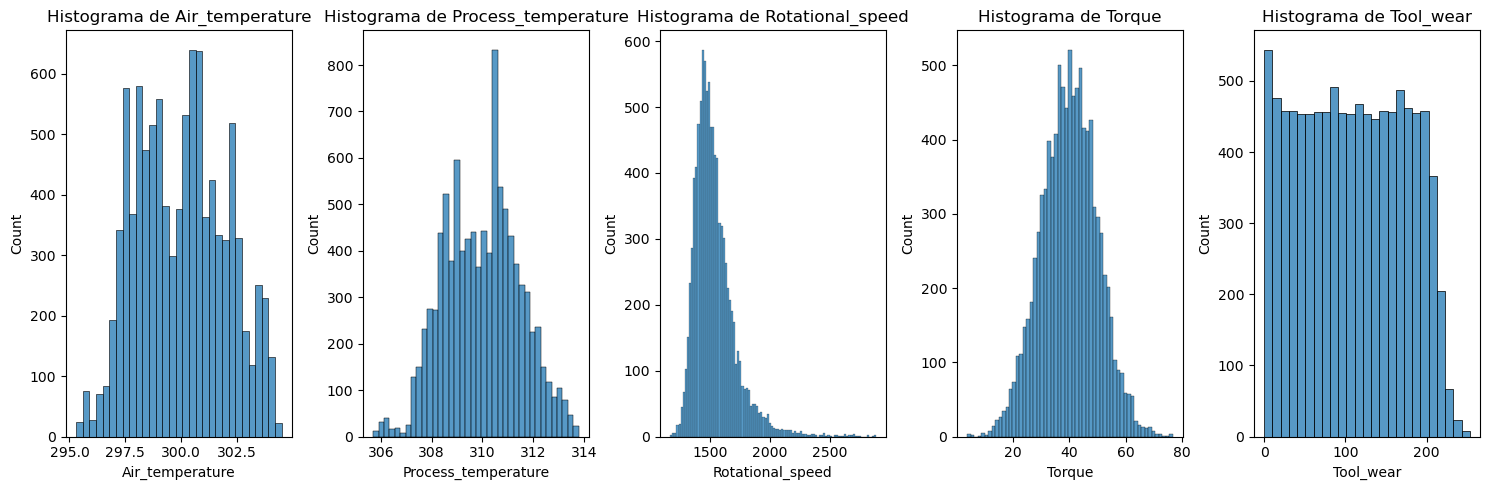

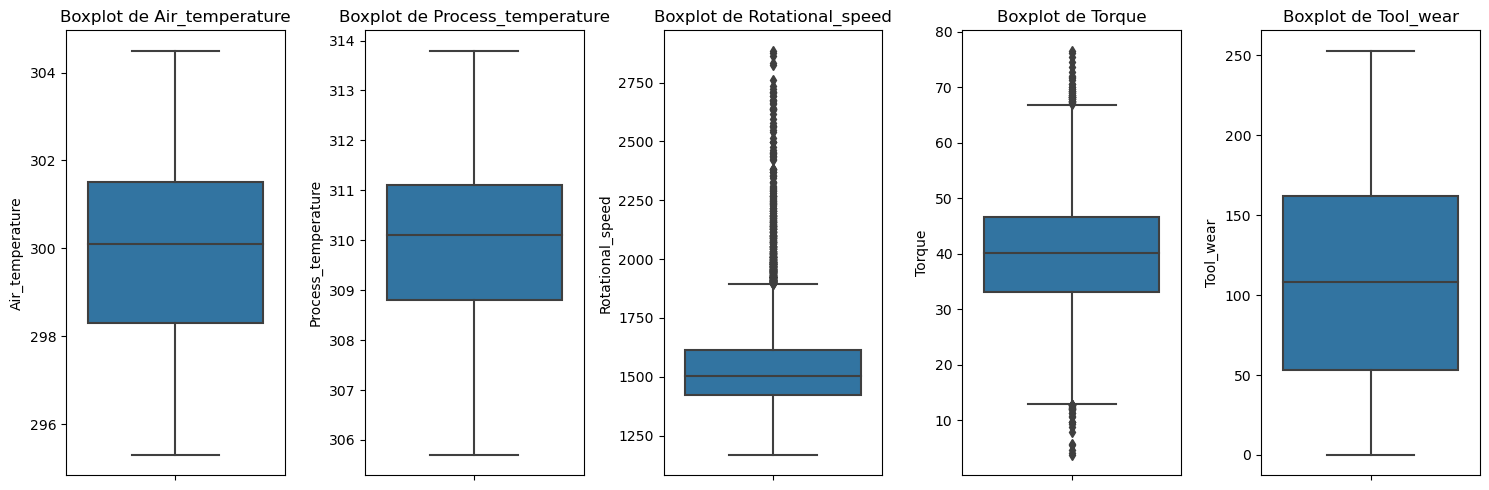

In [17]:
NUMERIC_FEATURES = ['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_wear']
CATEGORIC_FEATURES = ['Type']

# Create the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=len(NUMERIC_FEATURES), figsize=(15, 5))

# Plot histograms 
for i, feature in enumerate(NUMERIC_FEATURES):
    sns.histplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'Histograma de {feature}')

# Adjust subplot 
plt.tight_layout()

# Show histogram 
plt.show()

# Create the figure and axess
fig, axes = plt.subplots(nrows=1, ncols=len(NUMERIC_FEATURES), figsize=(15, 5))

# Plot boxplot side by side
for i, feature in enumerate(NUMERIC_FEATURES):
    sns.boxplot(data=df, y=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot de {feature}')

# Adjust subplot
plt.tight_layout()

# Show boxplots
plt.show()

With respect to histogram, the columns Air_temperatura, Process_temperature and torque is similar to normal distribution and rotation_speed is assimetric with negative bias. Regarding to boxplot, here it’s possible confirm the hypothesis that exist outliers is some columns as soon as mencioned in the begging of this project. However, we won’t remove this values because make sense that when a machine have one type of failure the values measurement by some sensor will increase so much. Furthermore, when the rotarional_speed increase a lot make totally sense that torque decrease too, this is a physics behavior, so the outliers detected in torque column with low values possibility is caused by this.

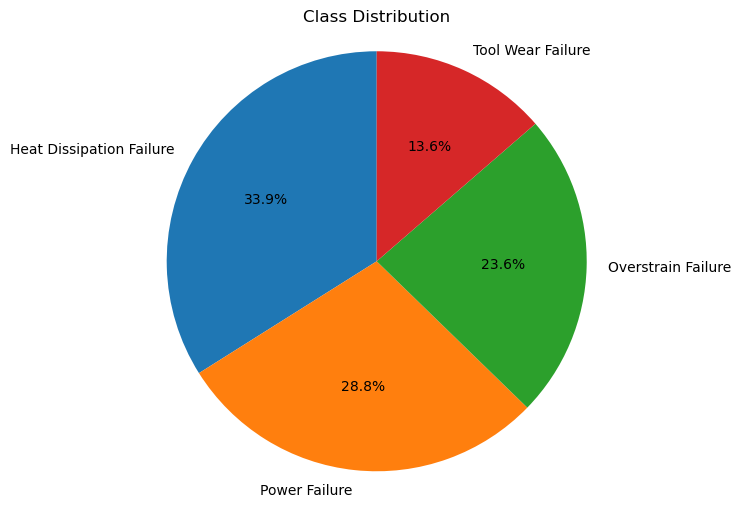

In [18]:
df_failure_type = df.loc[df['Failure_type'] != "No Failure"]

# Verifique o balanceamento resultante
proportions = df_failure_type['Failure_type'].value_counts(normalize=True)

# Plotar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Assegura que o gráfico seja desenhado como um círculo
plt.title('Class Distribution')
plt.show()

With respect to histogram, the columns Air_temperatura, Process_temperature and torque is similar to normal distribution and rotation_speed is assimetric with negative bias. Regarding to boxplot, here it’s possible confirm the hypothesis that exist outliers is some columns as soon as mencioned in the begging of this project. However, we won’t remove this values because make sense that when a machine have one type of failure the values measurement by some sensor will increase so much. Furthermore, when the rotarional_speed increase a lot make totally sense that torque decrease too, this is a physics behavior, so the outliers detected in torque column with low values possibility is caused by this.

A machine is operating normally, and both Rotational_speed and Torque have stable readings.
Suddenly, the machine encounters a problem. The Rotational_speed spikes, and as a result, Torque drops significantly due to physical laws (e.g., a higher speed might lead to lower torque in certain mechanical systems).

In [19]:
# Filter out non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

<Axes: >

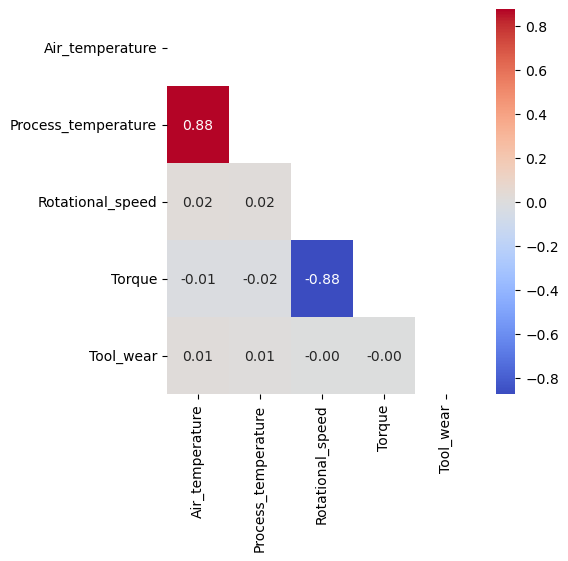

In [20]:
# Plot correlation of numeric values applying mask
corr = numeric_df.corr()
plt.figure(figsize = (5,5))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot = True, mask=mask, cmap='coolwarm', fmt = ".2f")

## Preprocessing

In [21]:
# Preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [22]:
# Models Pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

In [23]:
# Create preprocessor ColumnTransformer to do OneHotEncoder for CATEGORIC_FEATURES and StandardScaler() for NUMERIC_FEATURES
# Define the pipelines for numeric and categorical transformations
num_pipeline = Pipeline([
    ('num_features', StandardScaler())
])
cat_pipeline = Pipeline([
    ('cat_features', OneHotEncoder())
])
# Create the ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, NUMERIC_FEATURES),
    ('cat', cat_pipeline, CATEGORIC_FEATURES)
])
# Fit and transform the data
df_transformed = preprocessor.fit_transform(df)
# Converting the transformed data back to a dataframe for easier visualization
# The transformed data will have new column names, especially for the one hot encoded categories
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(CATEGORIC_FEATURES)
new_column_names = list(NUMERIC_FEATURES) + list(encoded_feature_names)
df_transformed = pd.DataFrame(df_transformed, columns=new_column_names)
df_transformed.head()

Air_temperature  Process_temperature  Rotational_speed    Torque  \
0        -0.951417            -0.946356          0.067484  0.283054   
1        -0.901428            -0.878954         -0.729604  0.634238   
2        -0.951417            -1.013759         -0.227940  0.945286   
3        -0.901428            -0.946356         -0.590253 -0.048061   
4        -0.901428            -0.878954         -0.729604  0.002108   

   Tool_wear  Type_High  Type_Low  Type_Medium  
0  -1.695647        0.0       0.0          1.0  
1  -1.648511        0.0       1.0          0.0  
2  -1.617087        0.0       1.0          0.0  
3  -1.585664        0.0       1.0          0.0  
4  -1.554240        0.0       1.0          0.0

In [24]:
#Dimension Reduction
from sklearn.decomposition import PCA

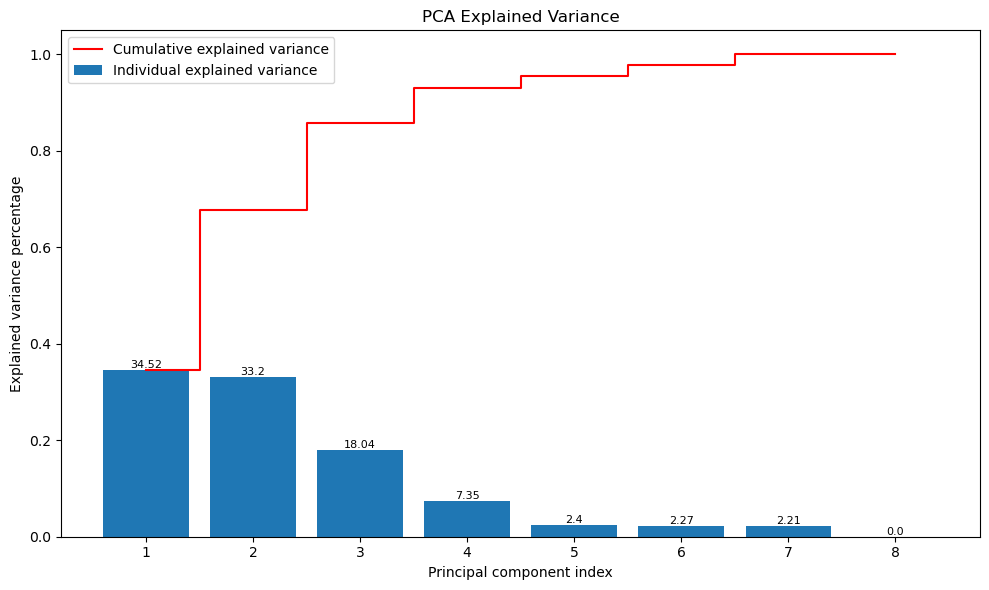

In [25]:
# Define PCA function
pca = PCA()
pca.fit(df_transformed) 

# PCA variance explained
exp_var = pca.explained_variance_ratio_
cum_exp_var = exp_var.cumsum()

# Number of components
n_pca_components = len(exp_var)

# Create the graphic
plt.figure(figsize=(10, 6))
bars = plt.bar(range(1, n_pca_components + 1), exp_var, align='center',
               label='Individual explained variance')
plt.step(range(1, n_pca_components + 1), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

# Add labels in each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval*100, 2), 
             va='bottom', ha='center', fontsize=8)

# Adjust others elements of the graphic
plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(ticks=list(range(1, n_pca_components + 1)))
plt.title('PCA Explained Variance')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

We can see that with 4 components already explained the variability of our data around 94%. So, we can try use only this components to model and analyse if the perfomance improve. In some cases the dataset can be critic and lost 6% of information can turn the model worst. We’ll analyse this in the next steps. Now, lets see what explain each component.

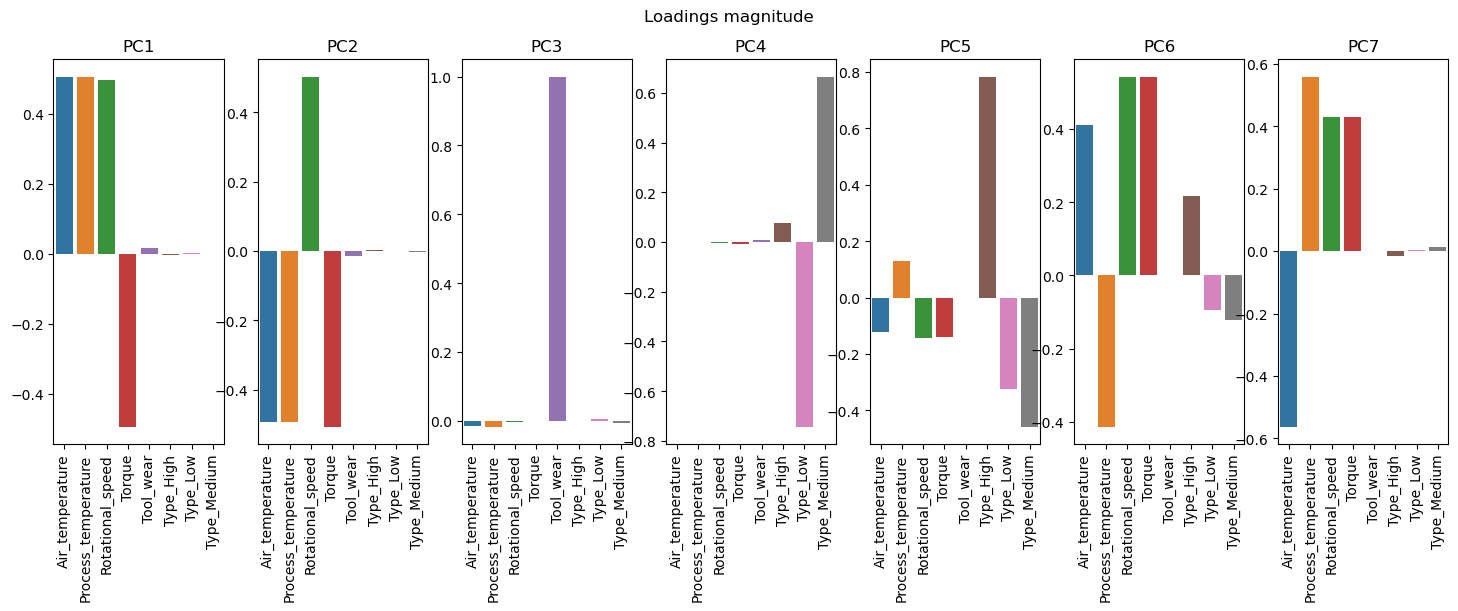

In [26]:
#Plot explanation of PCA components
# PCA with 7 components to analyse what explain each component
pca7 = PCA(n_components=7)
X_pca7 = pd.DataFrame(data=pca7.fit_transform(df_transformed), columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7'])

# Configure of the graphics
fig, axs = plt.subplots(ncols=7, figsize=(18,5))
fig.suptitle('Loadings magnitude')

all_features = NUMERIC_FEATURES + list(encoded_feature_names)  # Use encoded_feature_names do 
pca_loadings = pd.DataFrame(data=pca7.components_, columns=all_features)

#Plot the bar graphics
for j in range(7):
    ax = axs[j]
    sns.barplot(ax=ax, x=pca_loadings.columns, y=pca_loadings.values[j])
    ax.tick_params(axis='x', rotation=90)
    ax.title.set_text('PC'+str(j+1))
plt.show()

# Create a function to get metrics

We are considering average = ‘macro’. Because when applying this method to calculate metrics, we have a better approach to evaluating the model because this parameter calculates the F1 score for each class individually. If we use “weighted,” instance, the metric is calculated considering the weighted metrics; the
the majority class has more influence on the result of this metric. In our scenario, the majority class is ‘No Failures’, and it’s easier to simply predict that the machine will not fail. When considering the importance of correctly classifying the types of failures, it’s crucial to remember that the model needs to perform well for all classes independently. Therefore, let’s examine the model’s metrics using average = ‘macro’.

In [27]:
from sklearn.metrics import f1_score

def get_metrics(y_true, y_pred):
    # Calculating F1 scores for each class
    f1_scores_per_class = f1_score(y_true, y_pred, average=None)
    
    dict_metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Balanced Accuracy': balanced_accuracy_score(y_true, y_pred),
        'Macro Recall': recall_score(y_true, y_pred, average='macro'),
        'Macro Precision': precision_score(y_true, y_pred, average='macro'),
        'Macro F1': f1_score(y_true, y_pred, average='macro'),
        'F1 Scores per Class': f1_scores_per_class
    }
    return dict_metrics

# Separate dataset in train and test

In [28]:
from sklearn.model_selection import train_test_split

df_model = df.copy()
X = df_model[NUMERIC_FEATURES + CATEGORIC_FEATURES]
y = df_model['Failure_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

# Create model with PCA and class_weight

### RandomForestClassifier

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler

# Creating pipeline with PCA analysis and balanced class
pip_model_pca = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=4)),
    ('model', RandomForestClassifier(random_state=42))
])

# Fit pipeline with PCA
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pip_model_pca.fit(X_train, y_train, model__sample_weight=weights)

# Generate Predictions using the correctly fitted pipeline
y_pred = pip_model_pca.predict(X_test)

# Evaluate Metrics
metrics = get_metrics(y_test, y_pred)

# View Results
metrics

{'Accuracy': 0.9709273182957393,
 'Balanced Accuracy': 0.30503986000630023,
 'Macro Recall': 0.30503986000630023,
 'Macro Precision': 0.7275902602854744,
 'Macro F1': 0.359882129822811,
 'F1 Scores per Class': array([0.08695652, 0.9851814 , 0.54545455, 0.18181818, 0.        ])}

### GradientBoostingClassifier

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
# Creating pipeline with PCA analysis and balanced class
pip_model_pca = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=4)),
    ('model', GradientBoostingClassifier(random_state=42))
])

# Fit pipeline with PCA
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pip_model_pca.fit(X_train, y_train, model__sample_weight=weights)

# Generate Predictions using the correctly fitted pipeline
y_pred = pip_model_pca.predict(X_test)

# Evaluate Metrics
metrics = get_metrics(y_test, y_pred)

# View Results
metrics

{'Accuracy': 0.8786967418546366,
 'Balanced Accuracy': 0.7085326126948457,
 'Macro Recall': 0.7085326126948457,
 'Macro Precision': 0.3582394621122058,
 'Macro F1': 0.4225401121560159,
 'F1 Scores per Class': array([0.24285714, 0.93512182, 0.43636364, 0.37931034, 0.11904762])}

**Gradient Boosting classifier has More Macro F1 than RandomForestClassifier Macro F1

# Create model without PCA and without class_weight

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier

# Creating pipeline without PCA analysis and balanced class with parameter by model
pip_model_no_pca = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(random_state=42))
])

# Fit pipeline without sample weights
pip_model_no_pca.fit(X_train, y_train)

# Step 1: Generate Predictions
y_pred = pip_model_no_pca.predict(X_test)

# Step 2: Evaluate Metrics
metrics = get_metrics(y_test, y_pred)

# Step 3: View Results
metrics

{'Accuracy': 0.9824561403508771,
 'Balanced Accuracy': 0.6086362520184243,
 'Macro Recall': 0.6086362520184243,
 'Macro Precision': 0.6817958745494976,
 'Macro F1': 0.6390462554056666,
 'F1 Scores per Class': array([0.84444444, 0.99147947, 0.57142857, 0.78787879, 0.        ])}

# Create model without PCA and with class_weight

In [32]:
# Creating pipeline without PCA analysis and balanced class with parameter by model
pip_model_no_pca = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(random_state=0))
])

# Fit pipeline with sample weights
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pip_model_no_pca.fit(X_train, y_train, model__sample_weight=weights)

# Step 1: Generate Predictions
y_pred = pip_model_no_pca.predict(X_test)

# Step 2: Evaluate Metrics
metrics = get_metrics(y_test, y_pred)

# Step 3: View Results
metrics

{'Accuracy': 0.9548872180451128,
 'Balanced Accuracy': 0.8089450719853029,
 'Macro Recall': 0.8089450719853029,
 'Macro Precision': 0.5918666031005705,
 'Macro F1': 0.6555845607554603,
 'F1 Scores per Class': array([0.78571429, 0.97652334, 0.57894737, 0.7804878 , 0.15625   ])}

While PCA helps in reducing dimensionality and computational complexity, it might not always lead to better model performance, particularly in terms of the macro F1 score. The model without PCA has shown better performance, indicating that the original features provided more valuable information for classification tasks.

Macro F1 is important because:

1. **Equal Weighting**: It gives equal importance to all classes, treating minority and majority classes equally.
2. **Comprehensive Performance**: It combines precision and recall, providing a balanced measure of accuracy and coverage.
3. **Sensitivity to Imbalance**: It effectively highlights model performance across all classes, especially in imbalanced datasets, ensuring no class is overlooked.

### SMOTE (Synthetic Minority Over-sampling Technique) for oversampling the minority class and Tomek links or NearMiss for undersampling the majority class.

*SMOTE generates synthetic samples for the minority class by interpolating between existing samples, suitable for continuous features.

*SMOTENC extends SMOTE to handle both continuous and categorical features using different strategies for each type of feature.

*TomekLinks removes majority class samples that are close to minority class samples, helping to clean the dataset and reduce class overlap.

*NearMiss selects a subset of majority class samples based on their distance to minority class samples, aiming to balance the dataset while preserving important characteristics.

# Using SMOTE

In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier

# Create the pipeline with SMOTE only
pip_model_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=2023)),
    ('model', GradientBoostingClassifier(random_state=42))
])

# Fit the pipeline
pip_model_smote.fit(X_train, y_train)

# Generate Predictions
y_pred = pip_model_smote.predict(X_test)

# Step 2: Evaluate Metrics
metrics = get_metrics(y_test, y_pred)

# Step 3: View Results
metrics

{'Accuracy': 0.9473684210526315,
 'Balanced Accuracy': 0.8797940938400954,
 'Macro Recall': 0.8797940938400954,
 'Macro Precision': 0.5720442598203483,
 'Macro F1': 0.6610177339034464,
 'F1 Scores per Class': array([0.8       , 0.97262822, 0.68085106, 0.72340426, 0.12820513])}

# Using SMOTENC

In [34]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTENC

# Get categorical feature indices for SMOTENC
categorical_features_indices = [i for i, feature in enumerate(NUMERIC_FEATURES + CATEGORIC_FEATURES) 
                                if feature in CATEGORIC_FEATURES]

# Creating the new pipeline with SMOTENC using ImbPipeline
pip_model_smotenc = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smotenc', SMOTENC(categorical_features=categorical_features_indices, random_state=2023)),
    ('model', GradientBoostingClassifier(random_state=42))
])

# Fit the pipeline
pip_model_smotenc.fit(X_train, y_train)

# Generate Predictions
y_pred = pip_model_smotenc.predict(X_test)

# Step 2: Evaluate Metrics
metrics = get_metrics(y_test, y_pred)

# Step 3: View Results
metrics

{'Accuracy': 0.9493734335839599,
 'Balanced Accuracy': 0.8919047229270689,
 'Macro Recall': 0.8919047229270689,
 'Macro Precision': 0.5872179009280931,
 'Macro F1': 0.673429019227838,
 'F1 Scores per Class': array([0.8       , 0.97346072, 0.74418605, 0.69565217, 0.15384615])}

# Using TomekLinks

In [35]:
from imblearn.under_sampling import TomekLinks
from sklearn.ensemble import GradientBoostingClassifier

# Create the pipeline with TomekLinks only
pip_model_tomek = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('tomek', TomekLinks()),
    ('model', GradientBoostingClassifier(random_state=42))
])

# Fit the pipeline
pip_model_tomek.fit(X_train, y_train)

# Generate Predictions
y_pred = pip_model_tomek.predict(X_test)

# Step 2: Evaluate Metrics
metrics = get_metrics(y_test, y_pred)

# Step 3: View Results
metrics

{'Accuracy': 0.9824561403508771,
 'Balanced Accuracy': 0.6080979745064627,
 'Macro Recall': 0.6080979745064627,
 'Macro Precision': 0.6885656695489601,
 'Macro F1': 0.6410019510690652,
 'F1 Scores per Class': array([0.81818182, 0.99122354, 0.53846154, 0.85714286, 0.        ])}

# Using NearMiss

In [36]:
from imblearn.under_sampling import NearMiss
from sklearn.ensemble import GradientBoostingClassifier

# Create the pipeline with NearMiss only
pip_model_nearmiss = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('nearmiss', NearMiss()),
    ('model', GradientBoostingClassifier(random_state=42))
])

# Fit the pipeline
pip_model_nearmiss.fit(X_train, y_train)

# Generate Predictions
y_pred = pip_model_nearmiss.predict(X_test)

# Step 2: Evaluate Metrics
metrics = get_metrics(y_test, y_pred)

# Step 3: View Results
metrics

{'Accuracy': 0.21704260651629073,
 'Balanced Accuracy': 0.6516793539057597,
 'Macro Recall': 0.6516793539057597,
 'Macro Precision': 0.25486607245941767,
 'Macro F1': 0.15990954173147948,
 'F1 Scores per Class': array([0.16793893, 0.32900433, 0.22535211, 0.06227106, 0.01498127])}

## Combining SMOTE with TomekLinks and NearMiss

#### SMOTE with TomekLinks: Balances the dataset by oversampling the minority class and cleaning the majority class, reducing class overlap and improving class boundaries.

#### SMOTE with NearMiss: Balances the dataset by oversampling the minority class and selecting the most informative majority class samples, enhancing the learning process by focusing on relevant samples.


## Using SMOTE with TomekLinks

In [37]:
from imblearn.combine import SMOTETomek
from sklearn.ensemble import GradientBoostingClassifier

# Create the pipeline with SMOTE and TomekLinks
pip_model_smote_tomek = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote_tomek', SMOTETomek(smote=SMOTE(random_state=42), tomek=TomekLinks())),
    ('model', GradientBoostingClassifier(random_state=42))
])

# Fit the pipeline
pip_model_smote_tomek.fit(X_train, y_train)

# Generate Predictions
y_pred = pip_model_smote_tomek.predict(X_test)

# Step 2: Evaluate Metrics
metrics = get_metrics(y_test, y_pred)

# Step 3: View Results
metrics

{'Accuracy': 0.9468671679197995,
 'Balanced Accuracy': 0.8568714587141779,
 'Macro Recall': 0.8568714587141779,
 'Macro Precision': 0.5689126550138541,
 'Macro F1': 0.6527548524962457,
 'F1 Scores per Class': array([0.78571429, 0.97238449, 0.68181818, 0.69565217, 0.12820513])}

## SMOTE with NearMiss

In [38]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import NearMiss
pip_model_smoteenn = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smoteenn', SMOTEENN(random_state=42)),
    ('model', GradientBoostingClassifier(random_state=42))
])

# Fit the pipeline
pip_model_smoteenn.fit(X_train, y_train)

# Generate Predictions
y_pred = pip_model_smoteenn.predict(X_test)

# Step 2: Evaluate Metrics
metrics = get_metrics(y_test, y_pred)

# Step 3: View Results
metrics

{'Accuracy': 0.9428571428571428,
 'Balanced Accuracy': 0.8990058252162287,
 'Macro Recall': 0.8990058252162287,
 'Macro Precision': 0.5422035937707173,
 'Macro F1': 0.6393794388573751,
 'F1 Scores per Class': array([0.75862069, 0.97014925, 0.6122449 , 0.70588235, 0.15      ])}

## **Choosing Between SMOTENC and Sample Weights**
When considering strategies to address class imbalance in datasets, it's essential to weigh the advantages and disadvantages of SMOTENC and sample weights. Even if SMOTENC might yield a higher macro F1 score, opting for sample weights could be preferable due to various reasons:

### Prioritizing Original Distribution:

**Sample Weights**: By adjusting the importance of existing samples, we maintain the original data distribution, minimizing the risk of unexpected model behavior.
Reducing Overfitting Risk:

**Sample Weights**: Without introducing synthetic samples, there's a lower risk of overfitting, particularly beneficial in scenarios where overfitting is a concern.
Efficiency in Training:

**Sample Weights**: With no increase in dataset size, training remains efficient, making it a pragmatic choice for computational reasons.

#  GridSearchCV to find better model

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.dummy import DummyClassifier

# Creating pipeline without PCA analysis and balanced class with parameter by model
pip_model_no_pca = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(random_state=42))
])

# Fit pipeline with sample weights
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pip_model_no_pca.fit(X_train, y_train, model__sample_weight=weights)

# Updated parameters for GridSearchCV
params = {
    'model': [
        LogisticRegressionCV(max_iter=500, random_state=42),
        RandomForestClassifier(random_state=42),
        GradientBoostingClassifier(random_state=42),
        DummyClassifier()
    ],
}

# Running GridSearchCV
grid = GridSearchCV(pip_model_no_pca, params, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

# Collecting and printing the results
results = pd.DataFrame(grid.cv_results_)
best_model_index = results['mean_test_score'].idxmax()
best_model_params = results.loc[best_model_index, 'params']

# View results
print("Best model:")
print(best_model_params)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best model:
{'model': GradientBoostingClassifier(random_state=42)}


As we can see, GradientBoostingClassifier is the best model to our application in comparation with RandomForestClassifier, GradientBoostingClassifier and DummyClassifier. Even tought we know that DummyClassifier is the worst model its a good practice include him to have a reference with the model that dont learning with our data only classify with the most relevant class. So now, lets tunning the hyperparameters of our model.

# Tunnning the model

In [40]:
# New parameters for fine-tuning the RandomForestClassifier
fine_tune_params = {
    
    'model__n_estimators': [50, 100, 200, 300, 400, 500],
    'model__max_depth': [None, 5, 10, 15, 20]
}

# Running a new GridSearchCV for fine-tuning
fine_tune_grid = GridSearchCV(pip_model_no_pca, fine_tune_params, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)
fine_tune_grid.fit(X_train, y_train)

# Collecting and printing the fine-tuned results
fine_tuned_results = pd.DataFrame(fine_tune_grid.cv_results_)
fine_tuned_best_index = fine_tuned_results['mean_test_score'].idxmax()
fine_tuned_best_params = fine_tuned_results.loc[fine_tuned_best_index, 'params']

# Print best model parameters
print("Best fine-tuned model parameters:")
print(fine_tuned_best_params)

# Finding the best estimator paramaters
tuned_model = fine_tune_grid.best_estimator_
y_pred = tuned_model.predict(X_test)

# View new perfomance (focus on F1-score)
get_metrics(y_test, y_pred)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best fine-tuned model parameters:
{'model__max_depth': 5, 'model__n_estimators': 200}


{'Accuracy': 0.9834586466165414,
 'Balanced Accuracy': 0.640649796235251,
 'Macro Recall': 0.640649796235251,
 'Macro Precision': 0.6778613323821979,
 'Macro F1': 0.6563972277427178,
 'F1 Scores per Class': array([0.86956522, 0.99173127, 0.62068966, 0.8       , 0.        ])}

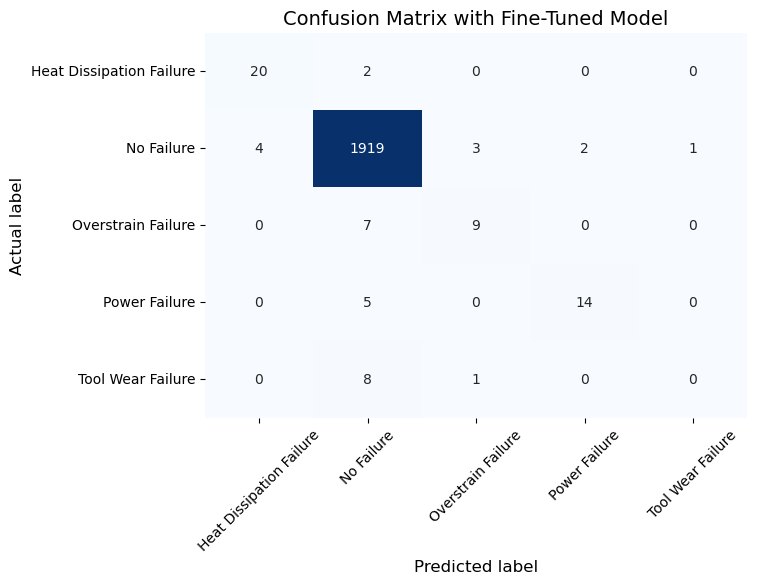

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with improved formatting
plt.figure(figsize=(7, 5))  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',  # 'd' to format numbers as integers
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_test),  # Ensure yticklabels match y_test
            cbar=False) 
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.title('Confusion Matrix with Fine-Tuned Model', fontsize=14)
plt.xticks(rotation=45) 
plt.yticks(rotation=0) 
plt.show()

In [42]:
def predict_failure_type(air_temp, process_temp, rot_speed, torque, tool_wear, type_cat):
    new_data = pd.DataFrame({
        'Air_temperature': [air_temp],
        'Process_temperature': [process_temp],
        'Rotational_speed': [rot_speed],
        'Torque': [torque],
        'Tool_wear': [tool_wear],
        'Type': [type_cat]
    })
    
    # Ensure the new_data contains the columns as expected by the pipeline
    prediction = tuned_model.predict(new_data)
    return prediction[0]

In [43]:
new_prediction = predict_failure_type(60, 150, 2500, 30, 100, 'Medium')
print(f'Predicted Failure Type: {new_prediction}')

Predicted Failure Type: No Failure


In [44]:
new_prediction = predict_failure_type(50, 250, 3500, 120, 200, 'Low')
print(f'Predicted Failure Type: {new_prediction}')

Predicted Failure Type: Power Failure


# Saving model for deployment

In [45]:
import pickle
with open('/Users/vijaykumarreddybommireddy/Downloads/Data analytics/model.pkl', 'wb') as model_file:
    pickle.dump(tuned_model, model_file)

## Conclusion

In this project, I applied classification algorithms to interpret and categorize equipment data, specifically focusing on identifying failure types or indicating whether a failure occurred. I developed a model capable of accurately classifying the type of failure in a specific process or determining if a failure occurred. This approach aids in post-analysis and decision-making, allowing for a better understanding of equipment performance and maintenance needs.

The application of machine learning techniques in this project demonstrates my practical experience in data analysis and classification modeling. While the model doesn't predict or preemptively anticipate failures, it effectively interprets data patterns to categorize equipment performance outcomes. This experience showcases my ability to apply data science methodologies to extract meaningful insights from complex datasets, contributing to proactive maintenance strategies and operational efficiency improvements.

## Streamlit_app📱⚙️: 
https://equipment-health-monitoring-system.streamlit.app/

In [46]:
# Convert target to binary
df['Failure'] = np.where(df['Failure_type'] == 'No Failure', 0, 1)

In [47]:
# Define features and target
X = df.drop(columns=['Failure_type', 'Failure'])
y = df['Failure']

In [48]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [49]:
# Creating pipeline without PCA analysis and balanced class with parameter by model
pip_model_no_pca = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(random_state=0))
])

# Fit pipeline with sample weights
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pip_model_no_pca.fit(X_train, y_train, model__sample_weight=weights) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_features',
                                                                   StandardScaler())]),
                                                  ['Air_temperature',
                                                   'Process_temperature',
                                                   'Rotational_speed', 'Torque',
                                                   'Tool_wear']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_features',
                                                                   OneHotEncoder())]),
                                                  ['Type'])])),
                ('model', GradientBoostingClassifier(random_state=0))])

In [50]:
# Preprocessing pipelines
numeric_features = ['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_wear']
categorical_features = ['Type']

In [51]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [60]:
# Fit pipeline with sample weights
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pip_model_no_pca.fit(X_train, y_train, model__sample_weight=weights)

# Updated parameters for GridSearchCV
params = {
    'model': [
        LogisticRegressionCV(max_iter=500, random_state=42),
        RandomForestClassifier(random_state=42),
        GradientBoostingClassifier(random_state=42),
        DummyClassifier()
    ],
}

# Running GridSearchCV
grid = GridSearchCV(pip_model_no_pca, params, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

# Collecting and printing the results
results = pd.DataFrame(grid.cv_results_)
best_model_index = results['mean_test_score'].idxmax()
best_model_params = results.loc[best_model_index, 'params']

# View results
print("Best model:")
print(best_model_params)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best model:
{'model': GradientBoostingClassifier(random_state=42)}


In [68]:
# Create pipeline with SMOTE
model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])


In [69]:
# Fit the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

In [70]:
from sklearn.metrics import f1_score

def get_metrics(y_true, y_pred):
    # Calculating F1 scores for each class
    f1_scores_per_class = f1_score(y_true, y_pred, average=None)
    
    dict_metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Balanced Accuracy': balanced_accuracy_score(y_true, y_pred),
        'Macro Recall': recall_score(y_true, y_pred, average='macro'),
        'Macro Precision': precision_score(y_true, y_pred, average='macro'),
        'Macro F1': f1_score(y_true, y_pred, average='macro'),
        'F1 Scores per Class': f1_scores_per_class
    }
    return dict_metrics

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluation
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1929
           1       0.91      0.65      0.76        66

    accuracy                           0.99      1995
   macro avg       0.95      0.82      0.88      1995
weighted avg       0.99      0.99      0.99      1995



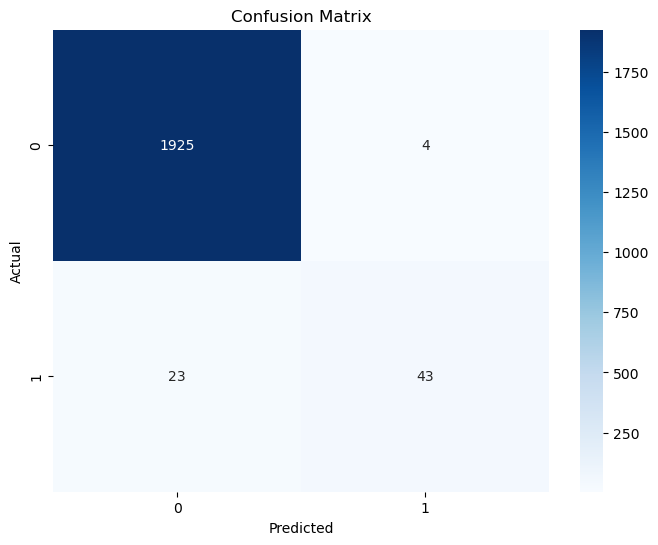

In [72]:
# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [73]:
# Segment-based evaluation
df_test = X_test.copy()
df_test['Actual'] = y_test
df_test['Predicted'] = y_pred

for type_ in df_test['Type'].unique():
    subset = df_test[df_test['Type'] == type_]
    print(f"Type: {type_}")
    print(classification_report(subset['Actual'], subset['Predicted']))
    print("\n")

Type: Low
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1162
           1       0.92      0.65      0.76        52

    accuracy                           0.98      1214
   macro avg       0.95      0.83      0.88      1214
weighted avg       0.98      0.98      0.98      1214



Type: Medium
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       568
           1       1.00      0.64      0.78        14

    accuracy                           0.99       582
   macro avg       1.00      0.82      0.89       582
weighted avg       0.99      0.99      0.99       582



Type: High
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       199
           1       0.00      0.00      0.00         0

    accuracy                           0.99       199
   macro avg       0.50      0.50      0.50       199
weighted avg       1.00      0.99   

In [74]:
# View new perfomance (focus on F1-score)
get_metrics(y_test, y_pred)

{'Accuracy': 0.9864661654135338,
 'Balanced Accuracy': 0.8247207691220133,
 'Macro Recall': 0.8247207691220133,
 'Macro Precision': 0.9515433177508847,
 'Macro F1': 0.8770488996829497,
 'F1 Scores per Class': array([0.99303585, 0.76106195])}

False Positives vs. False Negatives:

False Positives (predicting failure when there is none): May lead to unnecessary maintenance, increased costs, and potential downtime.

False Negatives (failing to predict an actual failure): More critical as it could result in unexpected equipment failure, leading to significant downtime and potential safety hazards.

Given the higher risk associated with false negatives, prioritize recall for the 'Failure' class to minimize the chances of missing actual failures.